# Robustness checks

This notebook contains various robustness checks for the simulation results concerning the diversity-expertise trade-off in the evidential sources model. In particular, robustness checks for:
1. Heuristic sizes: both different homogeneous heuristic sizes and heterogeneous heuristic sizes.
2. Reliability distributions: different reliability distribution ranges. 
3. Team size.
4. Number of sources.

The notebook contains one section for each of these cases. Each section consists of three subsections:
- Simulations, containing the code used to run the simulations;
- Statistics tables containinig the results of one-sample Wilcoxon tests (including p-values, confidence intervals, effect sizes, and ratios); and 
- An overview of the results, typically in the form of a table or a heatmap displaying the results for the three deliberative mechanisms. 

The required packages are imported in the *Setup* section.

---


## Setup
---

In [1]:
import os
import pprint
from math import comb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

from data_analysis.statistics import produce_df_1samp
from figures_scripts.generate_heatmap import heatmap
from grid_simulation import GridSimulation
from models.generate_teams import generate_diverse_team, generate_expert_team
from models.sources import Sources

translate_outcome_mechanism: dict = {
    "accuracy_opinion": "opinion-based mechanism",
    "accuracy_evidence": "evidence-based mechanism",
    "accuracy_bounded": "boundedly-rational evidence-based mechanism"
}

## Heuristic sizes
---

We considered different *homogeneous* heuristic sizes (where all agents have the same heuristic size) and *heterogeneous* heuristic sizes (where the agents can have different heuristic sizes). 

### Homogeneous case

We vary the heuristic sizes and the number of sources to not only include heuristic size `5` and number of sources `13` and `17` but also 
- heuristic size `7` and both `13` and `15` sources, and 
- heuristic size `9` and `15` sources

The heuristic sizes and number of sources are chosen in such a way that the total number of possible heuristics is roughly between 1,200 and 7,000.

In [59]:
heuristic_size = 7
print("=" * 40)
print(f"Heuristic size: {heuristic_size}")
print("=" * 40)
data = []
for n_sources in [11, 13, 15, 17]: 
    n_possible_heuristics = comb(n_sources, heuristic_size)
    data.append((n_sources, n_possible_heuristics))
    df = pd.DataFrame(data, columns=["n_sources", "n_possible_heuristics"])
    df["n_possible_heuristics"] = df["n_possible_heuristics"].map('{:,}'.format)
display(df)

heuristic_size = 9
print("=" * 40)
print(f"Heuristic size: {heuristic_size}")
print("=" * 40)
data = []
for n_sources in [13, 15, 17]: 
    n_possible_heuristics = comb(n_sources, heuristic_size)
    data.append((n_sources, n_possible_heuristics))
    df = pd.DataFrame(data, columns=["n_sources", "n_possible_heuristics"])
    df["n_possible_heuristics"] = df["n_possible_heuristics"].map('{:,}'.format)
display(df)

Heuristic size: 7


,n_sources,n_possible_heuristics
0,11,330
1,13,"1,716"
2,15,"6,435"
3,17,"19,448"


Heuristic size: 9


,n_sources,n_possible_heuristics
0,13,715
1,15,"5,005"
2,17,"24,310"


#### Simulations

In [ ]:
rels = [
    ("equi", rel_mean, 0.2)
    for rel_mean in [0.55, 0.60, 0.65, 0.7, 0.75]]

GridSimulation(
    team_types=["expert", "diverse"],
    n_sources_list=[13, 15],
    reliability_distribution_list=rels,
    heuristic_size=7,
    n_samples=10**3,
    estimate_sample_size=10**3,
).run()

In [4]:
n_sources_list = [15]
heuristic_size = 9

for n_sources in n_sources_list:
    n_possible_heuristics = comb(n_sources, heuristic_size)
    print(f"{n_sources=}, {heuristic_size=}, {n_possible_heuristics=:,}")

n_sources=15, heuristic_size=9, n_possible_heuristics=5,005


In [ ]:
rels = [
    ("equi", rel_mean, 0.2)
    for rel_mean in [0.55, 0.60, 0.65, 0.7, 0.75]]

GridSimulation(
    team_types=["expert", "diverse"],
    n_sources_list=[15],
    reliability_distribution_list=rels,
    heuristic_size=9,
    n_samples=10**3,
    estimate_sample_size=10**3,
).run()

#### Simulation statistics tables

In [60]:
for outcome in ["accuracy_opinion", "accuracy_evidence", "accuracy_bounded"]:
    print("="*40)
    print(f"{translate_outcome_mechanism[outcome].capitalize()}")
    print("="*40)
    for heuristic_size in [7, 9]:
        print(f"--- Heuristic size: {heuristic_size}")
        display(produce_df_1samp(outcome=outcome, heuristic_size=heuristic_size))

Opinion-based mechanism
--- Heuristic size: 7


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,13,0.55,-0.073,-25.5,0.0,0.866,-0.073185,-0.072710,False,1.000
1,13,0.60,-0.043,-22.3,0.0,0.866,-0.042832,-0.042333,False,1.000
2,13,0.65,-0.019,-16.8,0.0,0.866,-0.019618,-0.019205,False,1.000
3,13,0.70,-0.006,-9.3,0.0,0.866,-0.005798,-0.005514,False,1.000
4,13,0.75,-0.000,-0.9,0.0,0.280,-0.000321,-0.000192,False,0.622
5,15,0.55,-0.081,-29.8,0.0,0.866,-0.081136,-0.080408,False,1.000
6,15,0.60,-0.042,-23.6,0.0,0.866,-0.042423,-0.041652,False,1.000
7,15,0.65,-0.015,-14.4,0.0,0.866,-0.015562,-0.015036,False,1.000
8,15,0.70,-0.001,-2.3,0.0,0.540,-0.001442,-0.001082,False,0.720
9,15,0.75,0.003,13.1,0.0,0.866,0.002569,0.002698,False,0.992


--- Heuristic size: 9


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,15,0.55,-0.071,-25.5,0.0,0.866,-0.071428,-0.070753,False,1.000
1,15,0.60,-0.041,-23.4,0.0,0.866,-0.041417,-0.040791,False,1.000
2,15,0.65,-0.019,-19.0,0.0,0.866,-0.019015,-0.018666,False,1.000
3,15,0.70,-0.006,-12.8,0.0,0.866,-0.006208,-0.005954,False,1.000
4,15,0.75,-0.001,-5.4,0.0,0.781,-0.001054,-0.000900,False,0.877


Evidence-based mechanism
--- Heuristic size: 7


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,13,0.55,-0.031,-9.7,0.0,0.866,-0.031337,-0.031337,False,1.0
1,13,0.60,-0.017,-8.3,0.0,0.866,-0.017342,-0.017342,False,1.0
2,13,0.65,-0.007,-5.6,0.0,0.866,-0.006805,-0.006805,False,1.0
3,13,0.70,-0.001,-1.8,0.0,0.866,-0.001051,-0.001051,False,1.0
4,13,0.75,0.001,3.4,0.0,0.866,0.000777,0.000777,False,1.0
5,15,0.55,-0.050,-17.1,0.0,0.866,-0.050344,-0.050344,False,1.0
6,15,0.60,-0.025,-13.4,0.0,0.866,-0.024892,-0.024892,False,1.0
7,15,0.65,-0.007,-7.1,0.0,0.866,-0.007325,-0.007325,False,1.0
8,15,0.70,0.001,1.7,0.0,0.866,0.000835,0.000835,False,1.0
9,15,0.75,0.002,14.2,0.0,0.866,0.002306,0.002306,False,1.0


--- Heuristic size: 9


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,15,0.55,-0.029,-9.1,0.0,0.866,-0.028801,-0.028801,False,1.0
1,15,0.60,-0.015,-7.9,0.0,0.866,-0.015434,-0.015434,False,1.0
2,15,0.65,-0.006,-5.4,0.0,0.866,-0.005720,-0.005720,False,1.0
3,15,0.70,-0.001,-1.7,0.0,0.866,-0.000798,-0.000798,False,1.0
4,15,0.75,0.001,3.4,0.0,0.866,0.000551,0.000551,False,1.0


Boundedly-rational evidence-based mechanism
--- Heuristic size: 7


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,13,0.55,-0.069,-24.3,0.0,0.866,-0.069386,-0.069386,False,1.0
1,13,0.60,-0.036,-18.8,0.0,0.866,-0.035880,-0.035880,False,1.0
2,13,0.65,-0.012,-10.3,0.0,0.866,-0.011839,-0.011839,False,1.0
3,13,0.70,0.001,0.9,0.0,0.866,0.000538,0.000538,False,1.0
4,13,0.75,0.004,15.9,0.0,0.866,0.003652,0.003652,False,1.0
5,15,0.55,-0.075,-27.8,0.0,0.866,-0.075208,-0.075208,False,1.0
6,15,0.60,-0.033,-18.5,0.0,0.866,-0.032933,-0.032933,False,1.0
7,15,0.65,-0.005,-4.9,0.0,0.866,-0.005197,-0.005197,False,1.0
8,15,0.70,0.006,13.4,0.0,0.866,0.006455,0.006455,False,1.0
9,15,0.75,0.007,42.6,0.0,0.866,0.006918,0.006918,False,1.0


--- Heuristic size: 9


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,15,0.55,-0.068,-24.4,0.0,0.866,-0.067646,-0.067618,False,1.0
1,15,0.60,-0.035,-19.8,0.0,0.866,-0.034981,-0.034958,False,1.0
2,15,0.65,-0.012,-12.2,0.0,0.866,-0.012098,-0.012074,False,1.0
3,15,0.70,-0.001,-1.7,0.0,0.866,-0.000836,-0.000825,False,1.0
4,15,0.75,0.002,11.9,0.0,0.866,0.001931,0.001936,False,1.0


#### Simulation overview results

In [61]:
def heatmap_heuristics_homogeneous(
    outcome: str = "accuracy_opinion",
    heuristic_size_list: list = [5, 7, 9],
    measure: str = "absolute",
    mask: bool = True,
    colors: bool = False,
    show: bool = True,
):

    df_total = pd.DataFrame()

    for heuristic_size in heuristic_size_list:
        df = produce_df_1samp(outcome=outcome, heuristic_size=heuristic_size, perform_bca_ci=False)
        df["heuristic_size"] = heuristic_size
        if measure == "absolute":
            df["effect_percent"] = 100 * df["difference"]
        if measure == "relative":
            df["effect_percent"] = df["error_reduction"]
        
        df_total = pd.concat([df_total, df])

    df_total = df_total[df_total["n_sources"] < 21]
    
    pivot_df = df_total.pivot(
        index="rel_mean",
        columns=["heuristic_size", "n_sources"],
        values="effect_percent",
    )
    pivot_df.sort_index(inplace=True, ascending=False)

    sns.set_style("white")
    font_style = {"family": "Times New Roman", "size": 12}
    plt.rc("font", **font_style)
    plt.figure(figsize=(8, 3))

    heatmap_df = abs(pivot_df)
    heatmap_params = {
        # "annot": True,
        "cmap": "gray_r",  # "coolwarm"
        "square": True,
        "cbar_kws": {"shrink": 0.4},
    }
    if colors:
        heatmap_params["cmap"] = "coolwarm"
        heatmap_params["center"] = 0
        heatmap_df = pivot_df        

    if measure == "absolute":
        heatmap_params["vmin"] = -10
        heatmap_params["vmax"] = 10
        heatmap_params["annot"] = True
        if not colors:
            labels = pivot_df.copy()
            labels = labels.map(
                lambda x: (f"+{x:.1f}" if "-" not in str(x) else f"{x:.1f}")
            )
            heatmap_params["annot"] = labels
            heatmap_params["fmt"] = ""
            heatmap_params["vmin"] = 0

    if measure == "relative":
        heatmap_params["vmin"] = -100
        heatmap_params["vmax"] = 100
        heatmap_params["fmt"] = "g"
        heatmap_params["annot"] = True
        if not colors:
            labels = pivot_df.copy()
            labels = labels.map(
                lambda x: f"+{x:.0f}" if "-" not in str(x) else f"{x:.0f}"
            )
            heatmap_params["annot"] = labels
            heatmap_params["fmt"] = ""
            heatmap_params["vmin"] = 0

    if not mask:
        fig = sns.heatmap(heatmap_df, **heatmap_params)
    else:
        mask_df = df_total.pivot(
            index="rel_mean",
            columns=["n_sources", "heuristic_size"],
            values="p_value",
        )
        mask_df.fillna(value=0.0, inplace=True)
        mask_df = mask_df.astype(bool)
        mask_df.sort_index(inplace=True, ascending=False)
        fig = sns.heatmap(
            heatmap_df,
            mask=mask_df,
            # annot=labels,
            **heatmap_params,
        )

    fig.set_xlabel("Heuristic size (#) - Sources (#)")
    fig.set_ylabel("Reliability (mean)")
    plt.yticks(rotation=0)
    plt.savefig(
        f"figures/robustness/heatmap_heuristics_homogeneous_{outcome}_{measure}.eps",
        bbox_inches="tight",
        dpi=800,
        format="eps",
    )
    plt.savefig(
        f"figures/robustness/heatmap_heuristics_homogeneous_{outcome}_{measure}.png",
        bbox_inches="tight",
        dpi=800,
    )
    if show:
        plt.show()
    plt.close()

Opinion-based mechanism


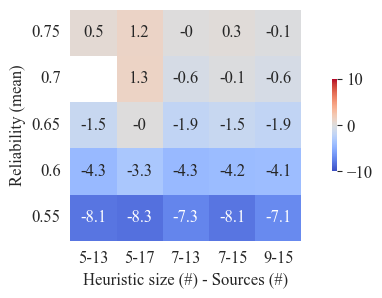

Evidence-based mechanism


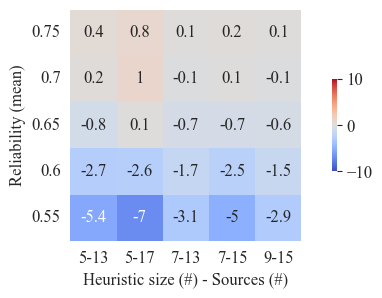

Boundedly-rational evidence-based mechanism


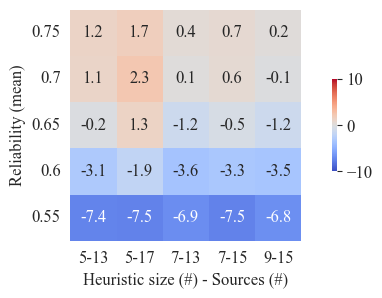

In [62]:
for outcome in ["accuracy_opinion", "accuracy_evidence", "accuracy_bounded"]:
    print("="*40)
    print(f"{translate_outcome_mechanism[outcome].capitalize()}")
    print("="*40)
    heatmap_heuristics_homogeneous(outcome=outcome, colors=True, show=True)


#### Individual scores for different heuristic sizes

In [ ]:
data_total = np.empty((0, 3))
scores_df = pd.DataFrame()
for heuristic_size in [int(5), int(7), int(9)]:
    for rel_mean in [0.55, 0.60, 0.65, 0.70, 0.75]:
        n_sources = 13
        reliability_distribution = ("equi", rel_mean, 0.2)
        sources = Sources(n_sources, reliability_distribution)
        n_possible_heuristics = comb(n_sources, heuristic_size)
        team = generate_expert_team(sources, heuristic_size, n_possible_heuristics)
        data = np.array([[agent.score, rel_mean, heuristic_size] for agent in team.members])
        data_total = np.append(data_total, data, axis=0)
        # data_df = pd.DataFrame(data, columns=["score", "rel_mean", "heuristic_size"])
        # scores_df = pd.concat([scores_df, data_df], axis=1)
scores_df = pd.DataFrame(data_total, columns=["score", "rel_mean", "heuristic_size"])

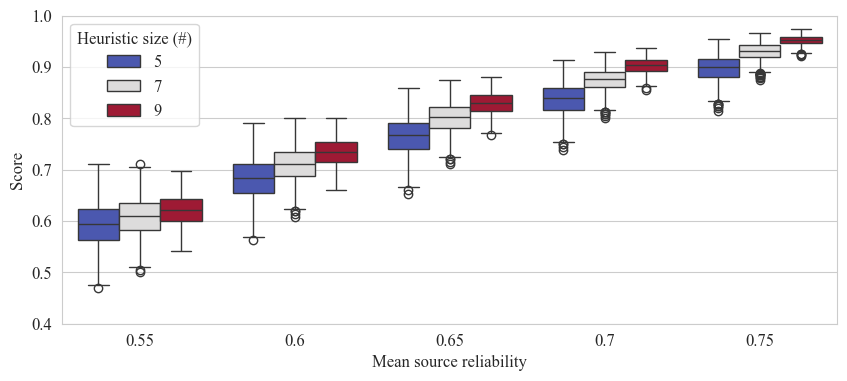

In [64]:
sns.set_style("whitegrid")
font_style = {"family": "Times New Roman", "size": 12}
plt.rc("font", **font_style)
plt.figure(figsize=(10, 4))

fig = sns.boxplot(data=scores_df, x="rel_mean", y="score", hue="heuristic_size", palette="coolwarm")
fig.set_yticks(0.4 + 0.1 * np.arange(7, dtype=int))
# fig.set_title("Individual scores")
fig.set_xlabel("Mean source reliability")
fig.set_ylabel("Score")

fig.legend(title="Heuristic size (#)", loc="upper left")
fig.legend_.texts[0].set_text(int(5))
fig.legend_.texts[1].set_text(int(7))
fig.legend_.texts[2].set_text(int(9))
plt.savefig(
    f"figures/individual_scores_various_heuristics.png",
    bbox_inches="tight",
    dpi=800,
)


### Heterogeneous case

We consider heterogeneous pools of agents with heuristic size in `[5, 7, 9]` and in settings with 15 sources.

The number of sources are chosen in such a way that the total number of possible heuristics is roughly between 1,200 and 15,000.

In [65]:
data =[]
for n_sources in [11, 13, 15, 17]:
    n_possible_heuristics = comb(n_sources, 5) + comb(n_sources, 7) + comb(n_sources, 9)
    data.append((n_sources, n_possible_heuristics))
    df = pd.DataFrame(data, columns=["n_sources", "n_possible_heuristics"])
    df["n_possible_heuristics"] = df["n_possible_heuristics"].map('{:,}'.format)
display(df)

,n_sources,n_possible_heuristics
0,11,847
1,13,"3,718"
2,15,"14,443"
3,17,"49,946"


#### Simulations

In [ ]:
rels = [
    ("equi", rel_mean, 0.2)
    for rel_mean in [0.55, 0.60, 0.65, 0.7, 0.75]]

GridSimulation(
    team_types=["expert", "diverse"],
    n_sources_list=[13, 15],
    reliability_distribution_list=rels,
    heuristic_size=[5, 7, 9],
    n_samples=10**3,
).run()

,team_types,n_sources,reliability_distribution,heuristic_size,team_size,n_samples,estimate_sample_size
0,"[expert, diverse]",13,"(equi, 0.55, 0.2)","[5, 7, 9]",9,1000,None
1,"[expert, diverse]",13,"(equi, 0.6, 0.2)","[5, 7, 9]",9,1000,None
2,"[expert, diverse]",13,"(equi, 0.65, 0.2)","[5, 7, 9]",9,1000,None
3,"[expert, diverse]",13,"(equi, 0.7, 0.2)","[5, 7, 9]",9,1000,None
4,"[expert, diverse]",13,"(equi, 0.75, 0.2)","[5, 7, 9]",9,1000,None


Running simulation 0 out of 5...


Calculating/estimating accuracy and bounded pool accuracy:   0%|          | 0/1001 [00:00<?, ?it/s]

Calculating pool accuracy:   0%|          | 0/2 [00:00<?, ?it/s]

Running simulation 1 out of 5...


Calculating/estimating accuracy and bounded pool accuracy:   0%|          | 0/1001 [00:00<?, ?it/s]

Calculating pool accuracy:   0%|          | 0/2 [00:00<?, ?it/s]

Running simulation 2 out of 5...


Calculating/estimating accuracy and bounded pool accuracy:   0%|          | 0/1001 [00:00<?, ?it/s]

Calculating pool accuracy:   0%|          | 0/2 [00:00<?, ?it/s]

Running simulation 3 out of 5...


Calculating/estimating accuracy and bounded pool accuracy:   0%|          | 0/1001 [00:00<?, ?it/s]

Calculating pool accuracy:   0%|          | 0/2 [00:00<?, ?it/s]

Running simulation 4 out of 5...


Calculating/estimating accuracy and bounded pool accuracy:   0%|          | 0/1001 [00:00<?, ?it/s]

Calculating pool accuracy:   0%|          | 0/2 [00:00<?, ?it/s]

#### Simulation statistics tables

In [68]:
produce_df_1samp(outcome="accuracy_opinion", heuristic_size=[5,7,9])

,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,15,0.55,-0.083,-30.6,0.0,0.866,-0.083176,-0.082564,False,1.0
1,15,0.60,-0.049,-28.0,0.0,0.866,-0.049601,-0.048980,False,1.0
2,15,0.65,-0.027,-27.1,0.0,0.866,-0.027162,-0.026384,False,1.0
3,15,0.70,-0.013,-26.5,0.0,0.866,-0.012795,-0.012282,False,1.0
4,15,0.75,-0.005,-26.0,0.0,0.866,-0.004804,-0.004549,False,1.0
5,13,0.55,-0.080,-28.2,0.0,0.866,-0.080193,-0.079213,False,1.0
6,13,0.60,-0.048,-25.2,0.0,0.866,-0.048652,-0.047524,False,1.0
7,13,0.65,-0.029,-25.7,0.0,0.866,-0.029269,-0.028448,False,1.0
8,13,0.70,-0.016,-28.7,0.0,0.866,-0.016342,-0.015542,False,1.0
9,13,0.75,-0.008,-35.6,0.0,0.866,-0.008034,-0.007611,False,1.0


#### Simulation overview results

Opinion-based mechanism


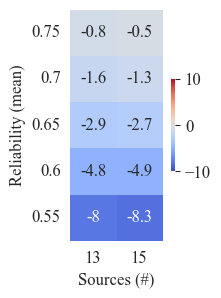

Evidence-based mechanism


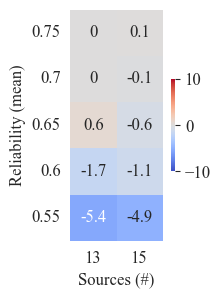

Boundedly-rational evidence-based mechanism


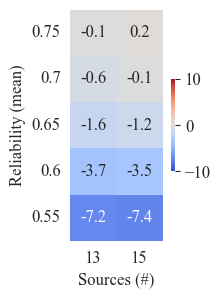

In [2]:
for outcome in ["accuracy_opinion", "accuracy_evidence", "accuracy_bounded"]:
    print("="*40)
    print(f"{translate_outcome_mechanism[outcome].capitalize()}")
    print("="*40)
    heatmap(
        outcome=outcome, 
        heuristic_size=[5, 7, 9], 
        colors=True, 
        show=True, 
        filename=f"figures/robustness/heatmap_heuristics_heterogeneous_{outcome}",
    )

## Reliability distributions
---

We are varying the range in the equidistant reliability distributions to include not only `0.2` but also `0.15` and `0.25`.

For example, when the reliabiltiy mean is `0.6`, the source reliabilities originally ranged from `0.5` to `0.7`, but in the new settings they range from `0.525` to `0.675` and from `0.475` to `0.725` respectively.

### Simulations

In [ ]:
rels = [
    ("equi", rel_mean, 0.15)
    for rel_mean in [0.55, 0.60, 0.65, 0.7, 0.75]]

GridSimulation(
    team_types=["expert", "diverse"],
    n_sources_list=[13, 17],
    reliability_distribution_list=rels,
    n_samples=10**3,
    estimate_sample_size=10**3,
).run()

,team_types,n_sources,reliability_distribution,heuristic_size,team_size,n_samples,estimate_sample_size
0,"[expert, diverse]",17,"(equi, 0.55, 0.15)",5,9,1000,None
1,"[expert, diverse]",17,"(equi, 0.6, 0.15)",5,9,1000,None
2,"[expert, diverse]",17,"(equi, 0.65, 0.15)",5,9,1000,None
3,"[expert, diverse]",17,"(equi, 0.7, 0.15)",5,9,1000,None
4,"[expert, diverse]",17,"(equi, 0.75, 0.15)",5,9,1000,None


Running simulation 0 out of 5...


Calculating/estimating accuracies and bounded pool accuracies:   0%|          | 0/1001 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
rels = [
    ("equi", rel_mean, 0.25)
    for rel_mean in [0.55, 0.60, 0.65, 0.7, 0.75]]

GridSimulation(
    team_types=["expert", "diverse"],
    n_sources_list=[13, 17],
    reliability_distribution_list=rels,
    n_samples=10**3,
    estimate_sample_size=10**3,
).run()

          team_types  n_sources reliability_distribution  heuristic_size  \
0  [expert, diverse]         13       (equi, 0.55, 0.25)               5   
1  [expert, diverse]         13        (equi, 0.6, 0.25)               5   
2  [expert, diverse]         13       (equi, 0.65, 0.25)               5   
3  [expert, diverse]         13        (equi, 0.7, 0.25)               5   
4  [expert, diverse]         13       (equi, 0.75, 0.25)               5   

   team_size  n_samples estimate_sample_size  
0          9       1000                 None  
1          9       1000                 None  
2          9       1000                 None  
3          9       1000                 None  
4          9       1000                 None  
Running simulation 0
team_types                   [expert, diverse]
n_sources                                   13
reliability_distribution    (equi, 0.55, 0.25)
heuristic_size                               5
team_size                                    9
n_sam

100%|██████████| 1001/1001 [05:22<00:00,  3.11it/s]


Running simulation 1
team_types                  [expert, diverse]
n_sources                                  13
reliability_distribution    (equi, 0.6, 0.25)
heuristic_size                              5
team_size                                   9
n_samples                                1000
estimate_sample_size                     None
Name: 1, dtype: object


100%|██████████| 1001/1001 [05:01<00:00,  3.32it/s]


Running simulation 2
team_types                   [expert, diverse]
n_sources                                   13
reliability_distribution    (equi, 0.65, 0.25)
heuristic_size                               5
team_size                                    9
n_samples                                 1000
estimate_sample_size                      None
Name: 2, dtype: object


100%|██████████| 1001/1001 [04:58<00:00,  3.35it/s]


Running simulation 3
team_types                  [expert, diverse]
n_sources                                  13
reliability_distribution    (equi, 0.7, 0.25)
heuristic_size                              5
team_size                                   9
n_samples                                1000
estimate_sample_size                     None
Name: 3, dtype: object


100%|██████████| 1001/1001 [04:54<00:00,  3.39it/s]


Running simulation 4
team_types                   [expert, diverse]
n_sources                                   13
reliability_distribution    (equi, 0.75, 0.25)
heuristic_size                               5
team_size                                    9
n_samples                                 1000
estimate_sample_size                      None
Name: 4, dtype: object


100%|██████████| 1001/1001 [04:53<00:00,  3.41it/s]


### Simulation statistics tables

In [9]:
for outcome in ["accuracy_opinion", "accuracy_evidence", "accuracy_bounded"]:
    print("="*80)
    print(f"{translate_outcome_mechanism[outcome].capitalize()}")
    print("="*80)
    for rel_range in [0.15, 0.25]:
        df_dummy = produce_df_1samp(outcome=outcome, reliability_range=rel_range)
        df_dummy = df_dummy[df_dummy["n_sources"] < 21]
        print(f"--- Reliability range: {rel_range}")
        display(df_dummy)
    

Opinion-based mechanism
--- Reliability range: 0.15


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,13,0.55,-0.053,-17.2,0.0,0.866,-0.053665,-0.052802,False,1.000
1,13,0.60,-0.019,-8.7,0.0,0.866,-0.019807,-0.018815,False,1.000
2,13,0.65,0.004,3.0,0.0,0.741,0.003792,0.004492,False,0.845
3,13,0.70,0.014,19.8,0.0,0.866,0.014217,0.014615,False,1.000
4,13,0.75,0.014,45.5,0.0,0.866,0.013899,0.014234,False,1.000
5,17,0.55,-0.052,-17.7,0.0,0.866,-0.052788,-0.051705,False,1.000
6,17,0.60,-0.006,-3.1,0.0,0.797,-0.006953,-0.006015,False,0.883
7,17,0.65,0.021,18.0,0.0,0.866,0.020492,0.021120,False,1.000
8,17,0.70,0.028,53.9,0.0,0.866,0.027937,0.028286,False,1.000
9,17,0.75,0.022,120.5,0.0,0.866,0.022142,0.022298,False,1.000


--- Reliability range: 0.25


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,13,0.55,-0.107,-42.0,0.0,0.866,-0.107978,-0.106643,False,1.000
1,13,0.60,-0.065,-37.5,0.0,0.866,-0.065939,-0.064719,False,1.000
2,13,0.65,-0.032,-30.2,0.0,0.866,-0.033271,-0.032080,False,1.000
3,13,0.70,-0.013,-21.5,0.0,0.866,-0.012952,-0.012239,False,0.999
4,13,0.75,-0.003,-12.6,0.0,0.828,-0.003509,-0.003080,False,0.909
5,17,0.55,-0.113,-48.3,0.0,0.866,-0.113751,-0.112096,False,1.000
6,17,0.60,-0.058,-37.1,0.0,0.866,-0.058625,-0.057298,False,1.000
7,17,0.65,-0.020,-21.3,0.0,0.866,-0.020604,-0.019549,False,1.000
8,17,0.70,-0.001,-1.3,0.0,0.198,-0.000911,-0.000295,False,0.580
9,17,0.75,0.004,21.9,0.0,0.864,0.003687,0.004033,False,0.979


Evidence-based mechanism
--- Reliability range: 0.15


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,13,0.55,-0.035,-11.0,NaN,NaN,NaN,NaN,False,NaN
1,13,0.60,-0.012,-5.4,NaN,NaN,NaN,NaN,False,NaN
2,13,0.65,0.003,2.7,NaN,NaN,NaN,NaN,False,NaN
3,13,0.70,0.009,15.0,NaN,NaN,NaN,NaN,False,NaN
4,13,0.75,0.008,33.8,NaN,NaN,NaN,NaN,False,NaN
5,17,0.55,-0.044,-14.9,NaN,NaN,NaN,NaN,False,NaN
6,17,0.60,-0.005,-2.4,NaN,NaN,NaN,NaN,False,NaN
7,17,0.65,0.016,16.5,NaN,NaN,NaN,NaN,False,NaN
8,17,0.70,0.020,49.6,NaN,NaN,NaN,NaN,False,NaN
9,17,0.75,0.013,109.7,NaN,NaN,NaN,NaN,False,NaN


--- Reliability range: 0.25


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,13,0.55,-0.072,-25.3,NaN,NaN,NaN,NaN,False,NaN
1,13,0.60,-0.041,-22.4,NaN,NaN,NaN,NaN,False,NaN
2,13,0.65,-0.018,-17.1,NaN,NaN,NaN,NaN,False,NaN
3,13,0.70,-0.005,-9.6,NaN,NaN,NaN,NaN,False,NaN
4,13,0.75,-0.000,-0.6,NaN,NaN,NaN,NaN,False,NaN
5,17,0.55,-0.095,-39.7,NaN,NaN,NaN,NaN,False,NaN
6,17,0.60,-0.046,-30.3,NaN,NaN,NaN,NaN,False,NaN
7,17,0.65,-0.013,-15.7,NaN,NaN,NaN,NaN,False,NaN
8,17,0.70,0.001,2.8,NaN,NaN,NaN,NaN,False,NaN
9,17,0.75,0.003,29.2,NaN,NaN,NaN,NaN,False,NaN


Boundedly-rational evidence-based mechanism
--- Reliability range: 0.15


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,13,0.55,-0.047,-15.1,0.0,0.866,-0.046750,-0.046397,False,1.000
1,13,0.60,-0.008,-3.5,0.0,0.866,-0.007927,-0.007401,False,1.000
2,13,0.65,0.017,13.2,0.0,0.866,0.016911,0.017171,False,1.000
3,13,0.70,0.025,40.3,0.0,0.866,0.025225,0.025354,False,1.000
4,13,0.75,0.021,86.8,0.0,0.866,0.021175,0.021288,False,1.000
5,17,0.55,-0.044,-14.7,0.0,0.866,-0.044110,-0.043018,False,1.000
6,17,0.60,0.007,3.6,0.0,0.848,0.006904,0.007821,False,0.943
7,17,0.65,0.035,33.8,0.0,0.866,0.034508,0.034953,False,1.000
8,17,0.70,0.038,89.9,0.0,0.866,0.038265,0.038566,False,1.000
9,17,0.75,0.028,206.1,0.0,0.866,0.027734,0.027841,False,1.000


--- Reliability range: 0.25


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,13,0.55,-0.101,-39.6,0.0,0.866,-0.101362,-0.100376,False,1.000
1,13,0.60,-0.054,-30.9,0.0,0.866,-0.053837,-0.053401,False,1.000
2,13,0.65,-0.020,-18.3,0.0,0.866,-0.020001,-0.019535,False,1.000
3,13,0.70,-0.002,-3.0,0.0,0.748,-0.001901,-0.001669,False,0.854
4,13,0.75,0.004,15.2,0.0,0.866,0.003428,0.003584,False,0.998
5,17,0.55,-0.105,-44.8,0.0,0.866,-0.105598,-0.103874,False,1.000
6,17,0.60,-0.044,-28.4,0.0,0.866,-0.044768,-0.043692,False,1.000
7,17,0.65,-0.006,-6.3,0.0,0.787,-0.006572,-0.005585,False,0.883
8,17,0.70,0.009,22.7,0.0,0.866,0.009098,0.009565,False,0.998
9,17,0.75,0.009,72.3,0.0,0.866,0.008923,0.009189,False,1.000


### Simulation overview results

In [12]:
def display_results_range(outcome: str = "accuracy_opinion", n_sources: int = 13):
    data = []
    for rel_range in [0.15, 0.2, 0.25]:
        df_dummy = produce_df_1samp(outcome=outcome, reliability_range=rel_range, perform_bca_ci=False)
        for idx, row in df_dummy.iterrows():
            data.append(
                [row["n_sources"], 
                 row["rel_mean"], 
                 rel_range, 
                 row["difference"], 
                 row["p_value"]],
            )
    
    df_results = pd.DataFrame(
        data, 
        columns=["n_sources", "rel_mean", "rel_range", "difference", "p_value"])
    df_results.loc[~(df_results["p_value"] > 0.001), "effect_percent"] = 100 * df_results["difference"]
    df_results = df_results[df_results["n_sources"] == n_sources]
    return df_results.pivot(index="rel_mean", columns="rel_range", values="effect_percent")

def heatmap_results_range(outcome: str = "accuracy_opinion", n_sources: int = 13):
    df_results = display_results_range(outcome=outcome, n_sources=n_sources)
    df_results.sort_index(inplace=True, ascending=False)
    
    sns.set_style("white")
    font_style = {"family": "Times New Roman", "size": 12}
    plt.rc("font", **font_style)
    plt.figure(figsize=(5, 3))

    heatmap_df = df_results
    heatmap_params = {
        "annot": True,
        "cmap": "coolwarm",
        "square": True,
        "cbar_kws": {"shrink": 0.4},
        "vmin": -10,
        "vmax": 10,
    }

    labels = df_results.copy()
    labels = labels.map(
        lambda x: (f"{x:.1f}")
    )
    heatmap_params["annot"] = labels
    heatmap_params["fmt"] = ""

    fig = sns.heatmap(
        heatmap_df,
        **heatmap_params,
    )

    fig.set_xlabel("Reliability range")
    fig.set_ylabel("Reliability (mean)")
    plt.yticks(rotation=0)
    plt.savefig(
        f"figures/robustness/heatmap_range_{outcome}_nsources{n_sources}.eps",
        bbox_inches="tight",
        dpi=800,
        format="eps",
    )
    plt.savefig(
        f"figures/robustness/heatmap_range_{outcome}_nsources{n_sources}.png",
        bbox_inches="tight",
        dpi=800,
    )
    plt.show()
    plt.close()
    

Opinion-based mechanism
--- Number of sources: 13


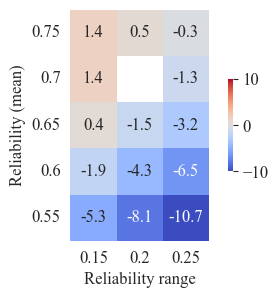

--- Number of sources: 17


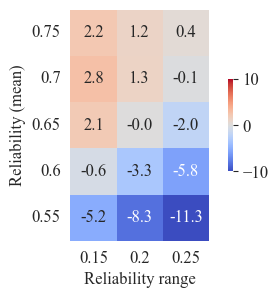

Evidence-based mechanism
--- Number of sources: 13


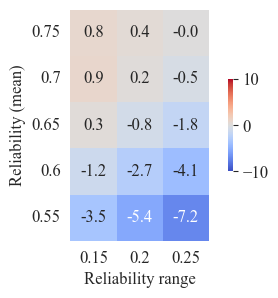

--- Number of sources: 17


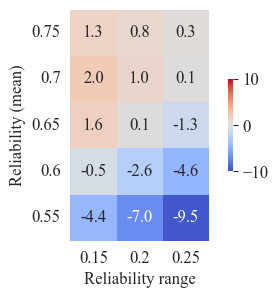

Boundedly-rational evidence-based mechanism
--- Number of sources: 13


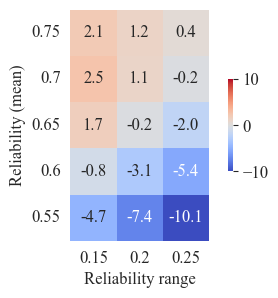

--- Number of sources: 17


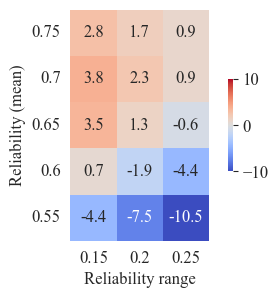

In [13]:
for outcome in ["accuracy_opinion", "accuracy_evidence", "accuracy_bounded"]:
    print("="*40)
    print(f"{translate_outcome_mechanism[outcome].capitalize()}")
    print("="*40)
    for n_sources in [13, 17]:
        print(f"--- Number of sources: {n_sources}")
        heatmap_results_range(outcome=outcome, n_sources=n_sources)
        # display(display_results_range(outcome, n_sources))

## Team size
---

We are varying the size of the teams to include not only `9` but also `5`, and `7`.

### Simulations

In [ ]:
team_size = 5

GridSimulation(
    team_types=["expert", "diverse"],
    n_sources_list=[13, 17],
    reliability_distribution_list=rels,
    team_size=team_size,
    n_samples=10**3,
    estimate_sample_size=10**3,
).run()

          team_types  n_sources reliability_distribution  heuristic_size  \
0  [expert, diverse]         13        (equi, 0.55, 0.2)               5   
1  [expert, diverse]         13         (equi, 0.6, 0.2)               5   
2  [expert, diverse]         13        (equi, 0.65, 0.2)               5   
3  [expert, diverse]         13         (equi, 0.7, 0.2)               5   
4  [expert, diverse]         13        (equi, 0.75, 0.2)               5   

   team_size  n_samples estimate_sample_size  
0          5       1000                 None  
1          5       1000                 None  
2          5       1000                 None  
3          5       1000                 None  
4          5       1000                 None  
Running simulation 0


100%|██████████| 1001/1001 [04:17<00:00,  3.89it/s]


Running simulation 1


100%|██████████| 1001/1001 [04:21<00:00,  3.82it/s]


Running simulation 2


100%|██████████| 1001/1001 [04:18<00:00,  3.88it/s]


Running simulation 3


100%|██████████| 1001/1001 [04:16<00:00,  3.90it/s]


Running simulation 4


100%|██████████| 1001/1001 [04:18<00:00,  3.87it/s]


In [ ]:
team_size = 7

GridSimulation(
    team_types=["expert", "diverse"],
    n_sources_list=[13, 17],
    reliability_distribution_list=rels,
    team_size=team_size,
    n_samples=10**3,
    estimate_sample_size=10**3,
).run()

          team_types  n_sources reliability_distribution  heuristic_size  \
0  [expert, diverse]         13        (equi, 0.55, 0.2)               5   
1  [expert, diverse]         13         (equi, 0.6, 0.2)               5   
2  [expert, diverse]         13        (equi, 0.65, 0.2)               5   
3  [expert, diverse]         13         (equi, 0.7, 0.2)               5   
4  [expert, diverse]         13        (equi, 0.75, 0.2)               5   

   team_size  n_samples estimate_sample_size  
0          7       1000                 None  
1          7       1000                 None  
2          7       1000                 None  
3          7       1000                 None  
4          7       1000                 None  
Running simulation 0


100%|██████████| 1001/1001 [04:47<00:00,  3.48it/s]


Running simulation 1


100%|██████████| 1001/1001 [04:30<00:00,  3.70it/s]


Running simulation 2


100%|██████████| 1001/1001 [04:35<00:00,  3.63it/s]


Running simulation 3


100%|██████████| 1001/1001 [04:44<00:00,  3.52it/s]


Running simulation 4


100%|██████████| 1001/1001 [04:31<00:00,  3.68it/s]


### Simulation statistics tables

In [14]:
for outcome in ["accuracy_opinion", "accuracy_evidence", "accuracy_bounded"]:
    print("="*80)
    print(f"{translate_outcome_mechanism[outcome].capitalize()}")
    print("="*80)
    for team_size in [3, 5, 7]:
        df_dummy = produce_df_1samp(outcome=outcome, team_size=team_size)
        print(f"--- Team size: {team_size}")
        display(df_dummy)

Opinion-based mechanism
--- Team size: 3


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio


--- Team size: 5


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,13,0.55,-0.083,-29.5,0.0,0.866,-0.084177,-0.082581,False,1.000
1,13,0.60,-0.046,-23.4,0.0,0.866,-0.046630,-0.045516,False,1.000
2,13,0.65,-0.019,-15.2,0.0,0.866,-0.019655,-0.018794,False,1.000
3,13,0.70,-0.003,-4.2,0.0,0.756,-0.003435,-0.002692,False,0.846
4,13,0.75,0.003,7.9,0.0,0.775,0.002384,0.002682,False,0.872
5,17,0.55,-0.094,-35.6,0.0,0.866,-0.094860,-0.092622,False,1.000
6,17,0.60,-0.049,-27.2,0.0,0.866,-0.050636,-0.048267,False,1.000
7,17,0.65,-0.018,-15.8,0.0,0.857,-0.019006,-0.017576,False,0.960
8,17,0.70,-0.001,-2.2,0.0,0.179,-0.001946,-0.000683,False,0.571
9,17,0.75,0.004,13.2,0.0,0.646,0.003208,0.003811,False,0.797


--- Team size: 7


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,13,0.55,-0.083,-29.6,0.0,0.866,-0.084132,-0.082864,False,1.000
1,13,0.60,-0.046,-23.0,0.0,0.866,-0.046058,-0.045001,False,1.000
2,13,0.65,-0.017,-13.1,0.0,0.866,-0.017258,-0.016210,False,1.000
3,13,0.70,-0.001,-1.4,0.0,0.234,-0.001435,-0.000772,False,0.588
4,13,0.75,0.004,13.2,0.0,0.842,0.003935,0.004407,False,0.946
5,17,0.55,-0.084,-31.6,0.0,0.866,-0.084268,-0.083023,False,1.000
6,17,0.60,-0.033,-17.9,0.0,0.866,-0.033429,-0.032305,False,1.000
7,17,0.65,0.001,0.5,0.0,0.146,0.000272,0.000955,False,0.553
8,17,0.70,0.014,25.8,0.0,0.866,0.013295,0.013735,False,1.000
9,17,0.75,0.013,67.2,0.0,0.866,0.012484,0.012654,False,1.000


Evidence-based mechanism
--- Team size: 3


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio


--- Team size: 5


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,13,0.55,-0.050,-16.2,NaN,NaN,NaN,NaN,False,NaN
1,13,0.60,-0.014,-6.5,NaN,NaN,NaN,NaN,False,NaN
2,13,0.65,0.009,7.1,NaN,NaN,NaN,NaN,False,NaN
3,13,0.70,0.017,28.6,NaN,NaN,NaN,NaN,False,NaN
4,13,0.75,0.015,64.2,NaN,NaN,NaN,NaN,False,NaN
5,17,0.55,-0.059,-21.2,NaN,NaN,NaN,NaN,False,NaN
6,17,0.60,-0.008,-4.1,NaN,NaN,NaN,NaN,False,NaN
7,17,0.65,0.020,20.7,NaN,NaN,NaN,NaN,False,NaN
8,17,0.70,0.026,66.3,NaN,NaN,NaN,NaN,False,NaN
9,17,0.75,0.018,155.5,NaN,NaN,NaN,NaN,False,NaN


--- Team size: 7


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,13,0.55,-0.050,-16.2,NaN,NaN,NaN,NaN,False,NaN
1,13,0.60,-0.014,-6.5,NaN,NaN,NaN,NaN,False,NaN
2,13,0.65,0.009,7.1,NaN,NaN,NaN,NaN,False,NaN
3,13,0.70,0.017,28.6,NaN,NaN,NaN,NaN,False,NaN
4,13,0.75,0.015,64.2,NaN,NaN,NaN,NaN,False,NaN
5,17,0.55,-0.059,-21.2,NaN,NaN,NaN,NaN,False,NaN
6,17,0.60,-0.008,-4.1,NaN,NaN,NaN,NaN,False,NaN
7,17,0.65,0.020,20.7,NaN,NaN,NaN,NaN,False,NaN
8,17,0.70,0.026,66.3,NaN,NaN,NaN,NaN,False,NaN
9,17,0.75,0.018,155.5,NaN,NaN,NaN,NaN,False,NaN


Boundedly-rational evidence-based mechanism
--- Team size: 3


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio


--- Team size: 5


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,13,0.55,-0.073,-25.9,0.0,0.866,-0.073133,-0.073133,False,1.000
1,13,0.60,-0.030,-15.2,0.0,0.866,-0.029876,-0.029876,False,1.000
2,13,0.65,-0.001,-0.6,0.0,0.866,-0.000778,-0.000778,False,1.000
3,13,0.70,0.012,19.8,0.0,0.866,0.011981,0.011981,False,1.000
4,13,0.75,0.012,53.0,0.0,0.866,0.012149,0.012149,False,1.000
5,17,0.55,-0.081,-30.8,0.0,0.866,-0.082927,-0.080009,False,1.000
6,17,0.60,-0.029,-16.1,0.0,0.866,-0.030605,-0.028179,False,0.991
7,17,0.65,0.003,2.8,0.0,0.309,0.002295,0.003592,False,0.622
8,17,0.70,0.015,30.8,0.0,0.866,0.014708,0.015588,False,0.996
9,17,0.75,0.013,79.0,0.0,0.866,0.013116,0.013502,False,1.000


--- Team size: 7


,n_sources,rel_mean,difference,error_reduction,p_value,effect_size,ci_low,ci_high,ties,ratio
0,13,0.55,-0.076,-26.8,0.0,0.866,-0.076340,-0.075505,False,1.000
1,13,0.60,-0.032,-16.4,0.0,0.866,-0.033036,-0.032358,False,1.000
2,13,0.65,-0.003,-2.3,0.0,0.670,-0.003015,-0.002520,False,0.802
3,13,0.70,0.011,16.8,0.0,0.866,0.010337,0.010819,False,1.000
4,13,0.75,0.012,47.2,0.0,0.866,0.011477,0.011673,False,1.000
5,17,0.55,-0.071,-27.0,0.0,0.866,-0.071399,-0.071399,False,1.000
6,17,0.60,-0.013,-7.3,0.0,0.866,-0.013419,-0.013419,False,1.000
7,17,0.65,0.019,19.8,0.0,0.866,0.019316,0.019316,False,1.000
8,17,0.70,0.027,70.0,0.0,0.866,0.027148,0.027148,False,1.000
9,17,0.75,0.020,170.7,0.0,0.866,0.019726,0.019726,False,1.000


### Simulation overview results

In [15]:
def display_results_team_size(outcome: str = "accuracy_opinion", n_sources: int = 13):
    data = []
    for team_size in [3, 5, 7, 9]:
        df_dummy = produce_df_1samp(outcome=outcome, team_size=team_size, perform_bca_ci=False)
        for idx, row in df_dummy.iterrows():
            data.append([
                row["n_sources"], 
                row["rel_mean"], 
                team_size, 
                row["difference"], 
                row["p_value"]
            ])
    df_results = pd.DataFrame(data, columns=["n_sources", "rel_mean", "team_size", "difference", "p_value"])
    df_results.loc[~(df_results["p_value"] > 0.001), "effect_percent"] = 100 * df_results["difference"]
    df_results = df_results[df_results["n_sources"] == n_sources]
    return df_results.pivot(index="rel_mean", columns="team_size", values="effect_percent")

def heatmap_results_team_size(outcome: str = "accuracy_opinion", n_sources: int = 13):
    df_results = display_results_team_size(outcome=outcome, n_sources=n_sources)
    df_results.sort_index(inplace=True, ascending=False)

    sns.set_style("white")
    font_style = {"family": "Times New Roman", "size": 12}
    plt.rc("font", **font_style)
    plt.figure(figsize=(5, 3))

    heatmap_df = df_results
    heatmap_params = {
        "annot": True,
        "cmap": "coolwarm",
        "square": True,
        "cbar_kws": {"shrink": 0.4},
        "vmin": -10,
        "vmax": 10,
    }

    labels = df_results.copy()
    labels = labels.map(
        lambda x: (f"{x:.1f}")
    )
    heatmap_params["annot"] = labels
    heatmap_params["fmt"] = ""

    fig = sns.heatmap(
        heatmap_df,
        **heatmap_params,
    )

    fig.set_xlabel("Team size (#)")
    fig.set_ylabel("Reliability (mean)")
    plt.yticks(rotation=0)
    plt.savefig(
        f"figures/robustness/heatmap_teamsize_{outcome}_nsources{n_sources}.eps",
        bbox_inches="tight",
        dpi=800,
        format="eps",
    )
    plt.savefig(
        f"figures/robustness/heatmap_teamsize_{outcome}_nsources{n_sources}.png",
        bbox_inches="tight",
        dpi=800,
    )
    plt.show()
    plt.close()

Opinion-based mechanism
--- Number of sources: 13


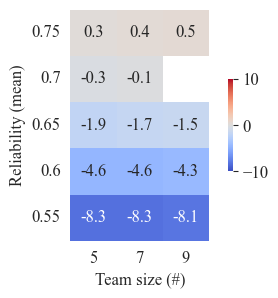

--- Number of sources: 17


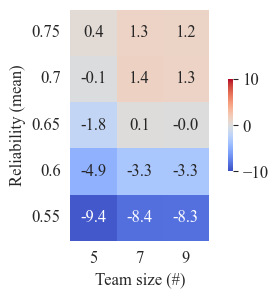

Evidence-based mechanism
--- Number of sources: 13


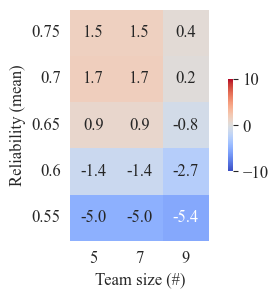

--- Number of sources: 17


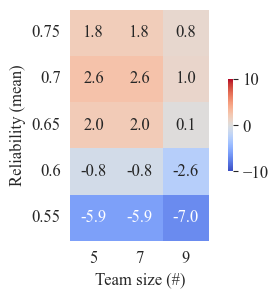

Boundedly-rational evidence-based mechanism
--- Number of sources: 13


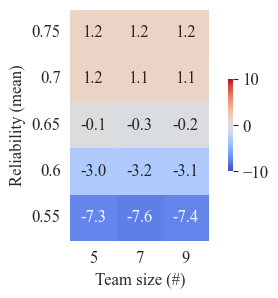

--- Number of sources: 17


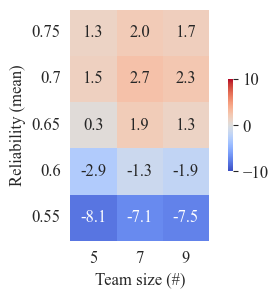

In [16]:
for outcome in ["accuracy_opinion", "accuracy_evidence", "accuracy_bounded"]:
    print("="*40)
    print(f"{translate_outcome_mechanism[outcome].capitalize()}")
    print("="*40)
    for n_sources in [13, 17]:
        print(f"--- Number of sources: {n_sources}")
        heatmap_results_team_size(outcome=outcome, n_sources=n_sources)
        # display(display_results_team_size(outcome, n_sources))

## Number of sources
---

We vary the number of sources to not only include `13` and `17` but also `21`.

As a sidenote: increasing the number of sources, leads to a significant increase in the number of possible heuristics.

In [ ]:
n_sources_list = [13, 17, 21]
heuristic_size = 5
data = []

for n_sources in n_sources_list:
    n_possible_heuristics = comb(n_sources, heuristic_size)
    data.append((n_sources, n_possible_heuristics))
    df = pd.DataFrame(data, columns=["n_sources", "n_possible_heuristics"])
    df["n_possible_heuristics"] = df["n_possible_heuristics"].map('{:,}'.format)
display(df)

,n_sources,n_possible_heuristics
0,13,"1,287"
1,17,"6,188"
2,21,"20,349"


### Simulations

In [ ]:
rels = [
    ("equi", rel_mean, 0.2)
    for rel_mean in [0.55, 0.60, 0.65, 0.7, 0.75]]

GridSimulation(
    team_types=["expert", "diverse"],
    n_sources_list=[21],
    reliability_distribution_list=rels,
    heuristic_size=5,
    n_samples=10**3,
    estimate_sample_size=10**5,
).run()

          team_types  n_sources reliability_distribution  heuristic_size  \
0  [expert, diverse]         21        (equi, 0.55, 0.2)               5   
1  [expert, diverse]         21         (equi, 0.6, 0.2)               5   
2  [expert, diverse]         21        (equi, 0.65, 0.2)               5   
3  [expert, diverse]         21         (equi, 0.7, 0.2)               5   
4  [expert, diverse]         21        (equi, 0.75, 0.2)               5   

   team_size  n_samples  estimate_sample_size  
0          9        100                  1000  
1          9        100                  1000  
2          9        100                  1000  
3          9        100                  1000  
4          9        100                  1000  
Running simulation 0


Calculating accuracies and bounded pool accuracies: 100%|██████████| 101/101 [00:00<?, ?it/s]
Calculating pool accuracies: 100%|██████████| 2/2 [00:00<?, ?it/s]


Running simulation 1


Calculating accuracies and bounded pool accuracies: 100%|██████████| 101/101 [00:00<00:00, 49861.66it/s]
Calculating pool accuracies: 100%|██████████| 2/2 [00:00<00:00, 2003.97it/s]


Running simulation 2


Calculating accuracies and bounded pool accuracies: 100%|██████████| 101/101 [00:00<?, ?it/s]
Calculating pool accuracies: 100%|██████████| 2/2 [00:00<?, ?it/s]


Running simulation 3


Calculating accuracies and bounded pool accuracies: 100%|██████████| 101/101 [00:00<?, ?it/s]
Calculating pool accuracies: 100%|██████████| 2/2 [00:00<?, ?it/s]


Running simulation 4


Calculating accuracies and bounded pool accuracies: 100%|██████████| 101/101 [00:00<?, ?it/s]
Calculating pool accuracies: 100%|██████████| 2/2 [00:00<?, ?it/s]


### Simulation statistics table

In [54]:
for outcome in ["accuracy_opinion", "accuracy_evidence", "accuracy_bounded"]:
    print("="*40)
    print(f"{translate_outcome_mechanism[outcome].capitalize()}")
    print("="*40)
    display(produce_df_1samp(outcome=outcome, perform_bca_ci=False))

KeyError: 'accuracy_opinion'

### Simulation overview results

In [17]:
def display_results_n_sources(outcome: str = "accuracy_opinion"):
    df_results = produce_df_1samp(outcome=outcome, perform_bca_ci=False)
    df_results.loc[~(df_results["p_value"] > 0.001), "effect_percent"] = 100 * df_results["difference"]
    return df_results.pivot(index="rel_mean", columns="n_sources", values="effect_percent")

def heatmap_results_n_sources(outcome: str = "accuracy_opinion"):
    df_results = display_results_n_sources(outcome=outcome)
    df_results.sort_index(inplace=True, ascending=False)
    
    sns.set_style("white")
    font_style = {"family": "Times New Roman", "size": 12}
    plt.rc("font", **font_style)
    plt.figure(figsize=(5, 3))

    heatmap_df = df_results
    heatmap_params = {
        "annot": True,
        "cmap": "coolwarm",
        "square": True,
        "cbar_kws": {"shrink": 0.4},
        "vmin": -10,
        "vmax": 10,
    }

    labels = df_results.copy()
    labels = labels.map(
        lambda x: (f"{x:.1f}")
    )
    heatmap_params["annot"] = labels
    heatmap_params["fmt"] = ""

    fig = sns.heatmap(
        heatmap_df,
        **heatmap_params,
    )

    fig.set_xlabel("Number of sources (#)")
    fig.set_ylabel("Reliability (mean)")
    plt.yticks(rotation=0)
    plt.savefig(
        f"figures/robustness/heatmap_nsources_{outcome}.eps",
        bbox_inches="tight",
        dpi=800,
        format="eps",
    )
    plt.savefig(
        f"figures/robustness/heatmap_nsources_{outcome}x.png",
        bbox_inches="tight",
        dpi=800,
    )
    plt.show()
    plt.close()

Opinion-based mechanism


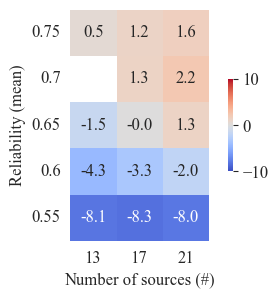

Evidence-based mechanism


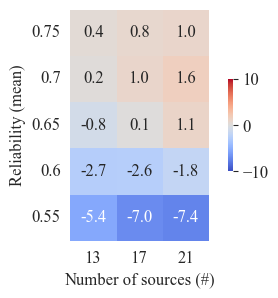

Boundedly-rational evidence-based mechanism


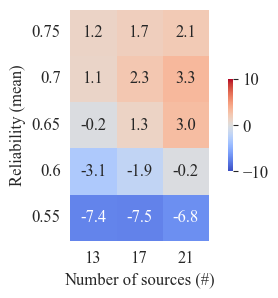

In [ ]:
for outcome in ["accuracy_opinion", "accuracy_evidence", "accuracy_bounded"]:
    print("="*40)
    print(f"{translate_outcome_mechanism[outcome].capitalize()}")
    print("="*40)
    heatmap_results_n_sources(outcome=outcome)